# Deep Learning - Mini-project 1
### Alex Delalande

In [1]:
%matplotlib inline

Load core code:

In [2]:
from mp1 import *

Print data:

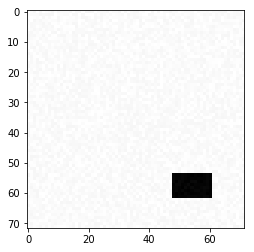

In [3]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

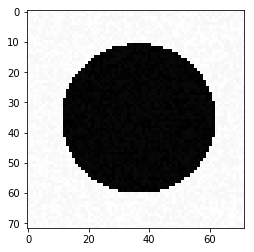

In [4]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

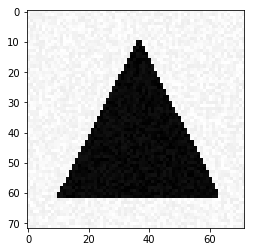

In [5]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

## 3) Simple classification:

*Build and train a linear classifier in Keras to classify a image into one of the three possible categories (i.e. rectangle, disk, triangle). Try using the stochastic gradient descent optimizer, then the Adam optimizer. Hints: You will have to use the following functions: Sequential, add, Dense (do not forget the activation), compile, fit, np_utils.to_categorical. For the Adam optimizer, I used a batch size of 32. You should use a small number of epochs when debugging to see if the optimization seems to converge correctly.*

Creating a dataset:

In [6]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
100
200


Reformatting the output (1-hot encoding):

In [7]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 3)
print(Y_train[0])

Using TensorFlow backend.


[0. 1. 0.]


### Optimizer 1: SGD

Creating the model: 1 layer linear network with Softmax activation
* Layer: $5184 \times 3$
* Activation: $Softmax$

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

input_shape = (X_train.shape[1],)

model = Sequential([Dense(3, input_shape=input_shape),
                    Activation('softmax')])

Define SGD optimizer:

Note: only the learning rate and the decay values were tuned, by simply looking at the loss values during the training process and ensuring a decrease of the loss at each iteration.

In [9]:
from keras.optimizers import SGD

sgd = SGD(lr=0.001,
          decay=1e-5,
          momentum=0.9,
          nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Fit:

In [10]:
model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1)

Epoch 1/15
300/300 [==============================] - 2s 6ms/step - loss: 1.0416 - acc: 0.5033
Epoch 2/15
300/300 [==============================] - 0s 296us/step - loss: 0.6995 - acc: 0.6833
Epoch 3/15
300/300 [==============================] - 0s 348us/step - loss: 0.5855 - acc: 0.7533
Epoch 4/15
300/300 [==============================] - 0s 291us/step - loss: 0.4621 - acc: 0.8267
Epoch 5/15
300/300 [==============================] - 0s 375us/step - loss: 0.3369 - acc: 0.9133
Epoch 6/15
300/300 [==============================] - 0s 365us/step - loss: 0.2926 - acc: 0.9267
Epoch 7/15
300/300 [==============================] - 0s 320us/step - loss: 0.2656 - acc: 0.9333
Epoch 8/15
300/300 [==============================] - 0s 729us/step - loss: 0.2451 - acc: 0.9467
Epoch 9/15
300/300 [==============================] - 0s 500us/step - loss: 0.2175 - acc: 0.9633
Epoch 10/15
300/300 [==============================] - 0s 342us/step - loss: 0.2180 - acc: 0.9533
Epoch 11/15
300/300 [==========

Test on new samples.

Indices of categories:
* 0: Rectangle
* 1: Circle
* 2: Triangle

In [11]:
X_rect = generate_a_rectangle()
X_rect = X_rect.reshape(1, X_rect.shape[0])
model.predict(X_rect)

array([[1., 0., 0.]], dtype=float32)

In [12]:
X_disk = generate_a_disk()
X_disk = X_disk.reshape(1, X_disk.shape[0])
model.predict(X_disk)

array([[4.0107084e-18, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [13]:
X_tri, _ = generate_a_triangle()
X_tri = X_tri.reshape(1, X_tri.shape[0])
model.predict(X_tri)

array([[0., 0., 1.]], dtype=float32)

Test on a test set:

In [14]:
[X_test, Y_test] = generate_test_set_classification(free_location=False)

Creating data:
0
100
200


In [15]:
Y_test = np_utils.to_categorical(Y_test, 3)
print(Y_test[0])

[0. 1. 0.]


Model evaluation: [loss_value, accuracy_value]

In [16]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 637us/step


[0.18950160066286723, 0.9733333333333334]

### Optimizer 2: Adam

Creating the model: 1 layer linear network with Softmax activation
* Layer: $5184 \times 3$
* Activation: $Softmax$

In [17]:
model = Sequential([Dense(3, input_shape=input_shape),
                    Activation('softmax')])

Define Adam optimizer:

Note: once again, only the learning rate and the decay values were tuned using the same method a with SGD.

In [18]:
from keras.optimizers import Adam

adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-3, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Fit:

In [19]:
model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1)

Epoch 1/15
300/300 [==============================] - 1s 2ms/step - loss: 1.3002 - acc: 0.4567
Epoch 2/15
300/300 [==============================] - 0s 303us/step - loss: 0.7964 - acc: 0.6500
Epoch 3/15
300/300 [==============================] - 0s 315us/step - loss: 0.6371 - acc: 0.7767
Epoch 4/15
300/300 [==============================] - 0s 336us/step - loss: 0.5527 - acc: 0.7467
Epoch 5/15
300/300 [==============================] - 0s 324us/step - loss: 0.5360 - acc: 0.7533
Epoch 6/15
300/300 [==============================] - 0s 356us/step - loss: 0.4404 - acc: 0.8100
Epoch 7/15
300/300 [==============================] - 0s 338us/step - loss: 0.4513 - acc: 0.7800
Epoch 8/15
300/300 [==============================] - 0s 382us/step - loss: 0.3428 - acc: 0.8500
Epoch 9/15
300/300 [==============================] - 0s 350us/step - loss: 0.3034 - acc: 0.9667
Epoch 10/15
300/300 [==============================] - 0s 900us/step - loss: 0.2790 - acc: 0.9333
Epoch 11/15
300/300 [==========

Test on new samples.

Indices of categories:
* 0: Rectangle
* 1: Circle
* 2: Triangle

In [20]:
model.predict(X_rect)

array([[3.1558983e-22, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [21]:
model.predict(X_disk)

array([[0., 1., 0.]], dtype=float32)

In [22]:
model.predict(X_tri)

array([[0., 0., 1.]], dtype=float32)

Model evaluation on a test set: [loss_value, accuracy_value]

In [23]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 728us/step


[0.25476902385552724, 0.8966666674613952]

## 4) Visualization of the solution:
*We would like to visualize the weights of the linear classifier. Check the output of the function model.get_weights(): The first part corresponds to the matrix of the classifier. Its columns have the same size as the input images, because Keras uses vector-matrix multiplications instead of matrix-vector multiplications.
Visualize the 3 columns as images.
Hint: Only two (short) lines of code are required to visualize one column.*

In [24]:
weights = model.get_weights()

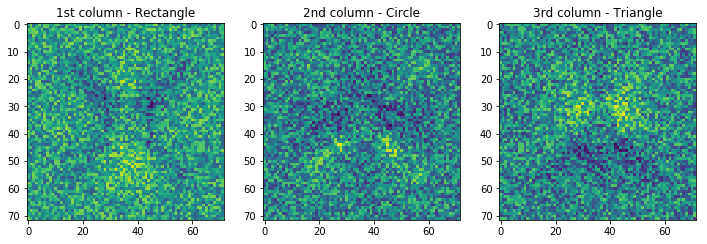

In [25]:
plt.figure(figsize=(12,12))

plt.subplot("131")
plt.imshow(weights[0][:,0].reshape(IMAGE_SIZE,IMAGE_SIZE))
plt.title("1st column - Rectangle")
plt.subplot("132")
plt.imshow(weights[0][:,1].reshape(IMAGE_SIZE,IMAGE_SIZE))
plt.title("2nd column - Circle")
plt.subplot("133")
plt.imshow(weights[0][:,2].reshape(IMAGE_SIZE,IMAGE_SIZE))
plt.title("3rd column - Triangle")
plt.show()

We can observe that the biggest weights are located at places where we **should not** observe the figure and reciproccaly smallest weights are located at places were the figure is in average present. 

This idea is mostly visible on the weights dedicated to the triangle: **around the top of the triangles** (which are always centered with a "horizontal base" at the bottom), **weights have the highest values**. Thus if the input has ones in this place **(i.e. is white since figures are encoded by zeros on a background of ones, meaning that the shape does not occupy this place)**, these weights will greatly increase the output of the layer which will be translated as a more likeley big probability for the 3rd output after the softmax activation. Reciprocally, if the input figure has zeros in this place (i.e. is black and the shape occupies this place), these big weights will be multiplied by zero and not impact the output, which will result in a more likely low probability for the 3rd output after the softmax operation.

## 5) A More Difficult Classification Problem

Now, the shapes are allowed to move within the images and change dimensions. You can generate
the new training set with:

In [26]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)

Creating data:
0
100
200


Reformatting the output (1-hot encoding):

In [27]:
Y_train = np_utils.to_categorical(Y_train, 3)
print(Y_train[0])

[1. 0. 0.]


Creating the model (1 layer linear network with Softmax activation) and defining Adam optimizer:

In [20]:
model = Sequential([Dense(3, input_shape=input_shape),
                    Activation('softmax')])

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Fit:

In [29]:
model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
300/300 [==============================] - 1s 3ms/step - loss: 3.1347 - acc: 0.2667
Epoch 2/30
300/300 [==============================] - 0s 297us/step - loss: 1.4848 - acc: 0.3467
Epoch 3/30
300/300 [==============================] - 0s 300us/step - loss: 1.1106 - acc: 0.4800
Epoch 4/30
300/300 [==============================] - 0s 318us/step - loss: 1.0275 - acc: 0.5067
Epoch 5/30
300/300 [==============================] - 0s 337us/step - loss: 0.9205 - acc: 0.5800
Epoch 6/30
300/300 [==============================] - 0s 846us/step - loss: 0.8298 - acc: 0.6267
Epoch 7/30
300/300 [==============================] - 0s 244us/step - loss: 0.8041 - acc: 0.6300
Epoch 8/30
300/300 [==============================] - 0s 349us/step - loss: 0.8122 - acc: 0.6700
Epoch 9/30
300/300 [==============================] - 0s 356us/step - loss: 0.7909 - acc: 0.6200
Epoch 10/30
300/300 [==============================] - 0s 323us/step - loss: 0.7493 - acc: 0.6700
Epoch 11/30
300/300 [==========

Generate testing samples for evaluation:

In [30]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
100
200


In [31]:
Y_test = np_utils.to_categorical(Y_test, 3)
print(Y_test[0])

[0. 1. 0.]


Model evaluation: [loss_value, accuracy_value]

In [32]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 744us/step


[1.1881920552253724, 0.5899999992052714]

### CNN model for this new data set:

We first add more training samples and reformat the input:

In [33]:
[X_train, Y_train] = generate_dataset_classification(600, 20, True)

Creating data:
0
100
200
300
400
500


Reformatting the output (1-hot encoding):

In [34]:
Y_train = np_utils.to_categorical(Y_train, 3)
print(Y_train[0])

[0. 0. 1.]


In [35]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_train = X_train.astype('float32')
print(X_train.shape)

X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
X_test = X_test.astype('float32')

(600, 72, 72, 1)


Model definition:
* Convolution with $32$ $5 \times 5$ filters
* Maxpool of size $4 \times 4$
* Convolution with $16$ $5 \times 5$ filters
* Maxpool of size $4 \times 4$
* Dropout with $p=0.25$
* Dense layer

In [21]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

model_cnn = Sequential([Conv2D(32, (5, 5), activation='relu', input_shape=(72, 72, 1)),
                        MaxPooling2D(pool_size=(4, 4)),
                        Conv2D(16, (5, 5), activation='relu', input_shape=(17, 17, 32)),
                        MaxPooling2D(pool_size=(4, 4)),
                        Dropout(0.25),
                        Flatten(),
                        Dense(3, activation='softmax')])

Optimizer & compilation:

In [37]:
adam = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-4, amsgrad=False)

model_cnn.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Fit:

In [38]:
model_cnn.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1)

Epoch 1/15
600/600 [==============================] - 6s 11ms/step - loss: 1.0869 - acc: 0.3883
Epoch 2/15
600/600 [==============================] - 5s 9ms/step - loss: 1.0505 - acc: 0.4833
Epoch 3/15
600/600 [==============================] - 5s 9ms/step - loss: 0.9750 - acc: 0.5650
Epoch 4/15
600/600 [==============================] - 5s 9ms/step - loss: 0.8620 - acc: 0.6050
Epoch 5/15
600/600 [==============================] - 5s 8ms/step - loss: 0.7890 - acc: 0.6317
Epoch 6/15
600/600 [==============================] - 5s 9ms/step - loss: 0.7052 - acc: 0.6917
Epoch 7/15
600/600 [==============================] - 5s 9ms/step - loss: 0.5935 - acc: 0.7500
Epoch 8/15
600/600 [==============================] - 5s 9ms/step - loss: 0.5298 - acc: 0.7667
Epoch 9/15
600/600 [==============================] - 5s 9ms/step - loss: 0.4708 - acc: 0.8167
Epoch 10/15
600/600 [==============================] - 5s 9ms/step - loss: 0.3790 - acc: 0.8583
Epoch 11/15
600/600 [===========================

Model evaluation: [loss_value, accuracy_value]

In [39]:
model_cnn.evaluate(X_test, Y_test)

300/300 [==============================] - 2s 6ms/step


[0.23896677315235137, 0.926666665871938]

Here, by doubling the size of the training set and replacing the linear model with a two layer CNN, we are able to get an accuracy $\geq 90\%$ on the test set.

The loss on the test set is of $\sim 0.2$, which is about the same value as the loss on the training set at the end of fitting (overfitting is handled with dropout). On the same task (with only 300 training samples), the linear classifier was getting a loss of $\sim 1.0$ (see above).

## 6) A Regression Problem

Generate a training set:

In [40]:
[X_train, Y_train] = generate_dataset_regression(600, 20)

Creating data:
0
100
200
300
400
500


Visualization of a training sample:

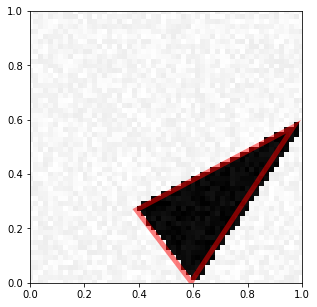

In [41]:
visualize_prediction(X_train[0], Y_train[0])

Reformating the input:

In [42]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_train = X_train.astype('float32')

print(X_train.shape)

(600, 72, 72, 1)


Ordering the output so that:
* leftmost vertex is described by the first two entries of Y
* middle vertex is described by the third and fourth entries of Y
* rightmost vertex is described by the last two entries of Y

In [43]:
n = Y_train.shape[0]
for i in range(n):
    U = Y_train[i][::2]
    V = Y_train[i][1::2]
    idx = np.argsort(U)
    U = U[idx]
    V = V[idx]
    Y_train[i] = [U[0], V[0], U[1], V[1], U[2], V[2]]

Normalizing the output:

In [44]:
Y_train_mean = np.mean(Y_train, axis=0)
Y_train_std = np.std(Y_train, axis=0)
Y_train = (Y_train - Y_train_mean) / Y_train_std

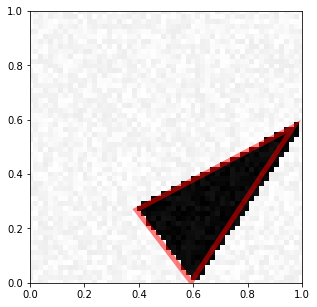

In [45]:
visualize_prediction(X_train[0], Y_train[0]*Y_train_std + Y_train_mean)

Model definition:
* Convolution with $50$ $5 \times 5$ filters
* Maxpool of size $4 \times 4$
* Convolution with $25$ $5 \times 5$ filters
* Maxpool of size $4 \times 4$
* Dropout with $p=0.25$
* Dense layer

In [46]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Lambda

model_cnn = Sequential([Conv2D(50, (5, 5), activation='relu'),
                        MaxPooling2D(pool_size=(4, 4)),
                        Dropout(0.4),
                        Conv2D(25, (5, 5), activation='relu'),
                        MaxPooling2D(pool_size=(2, 2)),
                        Dropout(0.4),
                        Flatten(),
                        Dense(6)])

Optimizer & compilation:

In [47]:
adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)

model_cnn.compile(loss='mean_squared_error', optimizer='adam')

Fit:

In [48]:
model_cnn.fit(X_train, Y_train, batch_size=32, epochs=60, verbose=1)

Epoch 1/60
600/600 [==============================] - 9s 15ms/step - loss: 1.0117
Epoch 2/60
600/600 [==============================] - 8s 13ms/step - loss: 0.9252
Epoch 3/60
600/600 [==============================] - 8s 13ms/step - loss: 0.7104
Epoch 4/60
600/600 [==============================] - 8s 13ms/step - loss: 0.5930
Epoch 5/60
600/600 [==============================] - 7s 12ms/step - loss: 0.5278
Epoch 6/60
600/600 [==============================] - 7s 12ms/step - loss: 0.4824
Epoch 7/60
600/600 [==============================] - 8s 13ms/step - loss: 0.4336
Epoch 8/60
600/600 [==============================] - 7s 12ms/step - loss: 0.3908
Epoch 9/60
600/600 [==============================] - 8s 13ms/step - loss: 0.3627
Epoch 10/60
600/600 [==============================] - 8s 13ms/step - loss: 0.3365
Epoch 11/60
600/600 [==============================] - 7s 12ms/step - loss: 0.3156
Epoch 12/60
600/600 [==============================] - 7s 12ms/step - loss: 0.3009
Epoch 13/60
6

Generate a test set:

In [49]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
100
200


Reformating the input:

In [50]:
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
X_test = X_test.astype('float32')

print(X_test.shape)

(300, 72, 72, 1)


In [51]:
n = Y_test.shape[0]
for i in range(n):
    U = Y_test[i][::2]
    V = Y_test[i][1::2]
    idx = np.argsort(U)
    U = U[idx]
    V = V[idx]
    Y_test[i] = [U[0], V[0], U[1], V[1], U[2], V[2]]

Normalizing the output:

In [52]:
Y_test_mean = np.mean(Y_test, axis=0)
Y_test_std = np.std(Y_test, axis=0)
Y_test = (Y_test - Y_test_mean) / Y_test_std

Model evaluation: [loss_value, accuracy_value]

In [53]:
model_cnn.evaluate(X_test, Y_test)

300/300 [==============================] - 4s 12ms/step


0.15505084057648977

We get a test loss comparable to the last training loss.

Visualization of some predictions:

In [54]:
Y_pred = model_cnn.predict(X_test)

Y_pred = Y_pred*Y_test_std + Y_test_mean

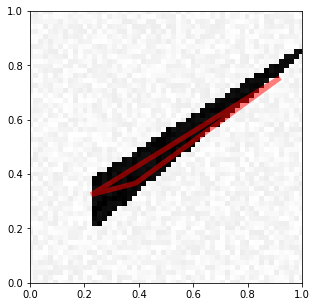

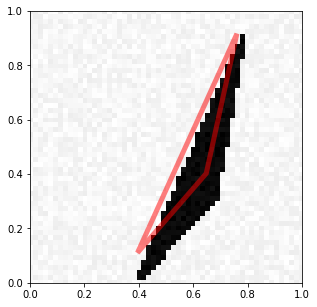

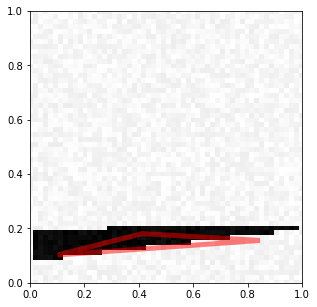

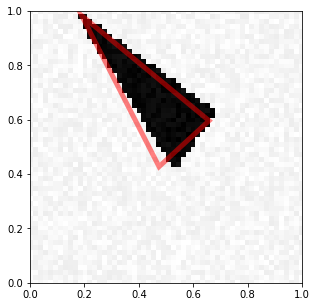

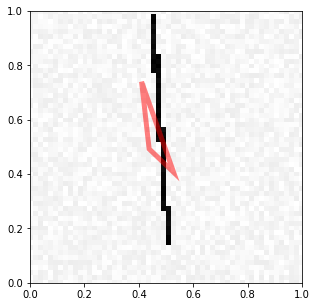

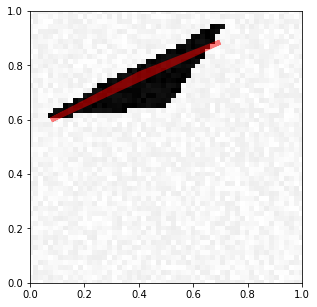

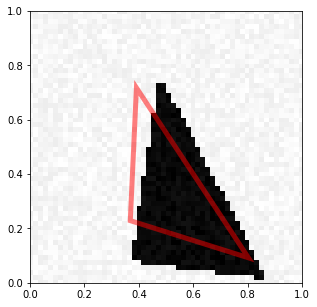

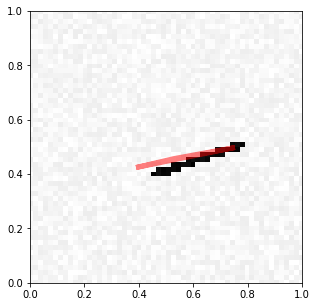

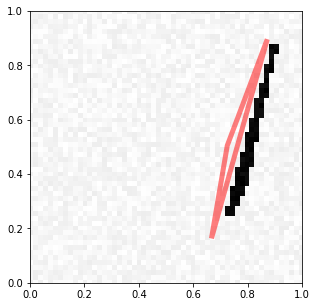

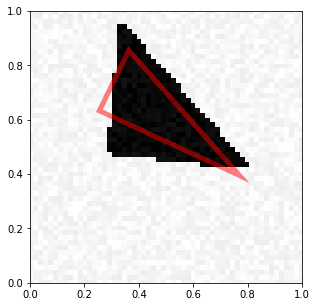

In [55]:
idxes = np.random.randint(0, 300, 10)

for i in range(10):
    visualize_prediction(X_test[idxes[i]], Y_pred[idxes[i]])

## 7) Image Denoising

Here, we tackle the image denoising problem: the input of our model will be a corrupted image $X$ with noise of random amplitude and the output $Y$ of this model should be a denoised version of $X$.

Creating a dataset:

we modified the *generate_a* functions so that $X$ is a corrupted version of $Y$: $X = Y + \epsilon N(0,1)$ (pixel-wise gaussian noise) with $\epsilon \sim U[0;30]$ (one sampling of $\epsilon$ for each image)

In [22]:
[X_train, Y_train] = generate_dataset_denoising(300)

Creating data:
0
100
200


Visualize one trainsing sample:

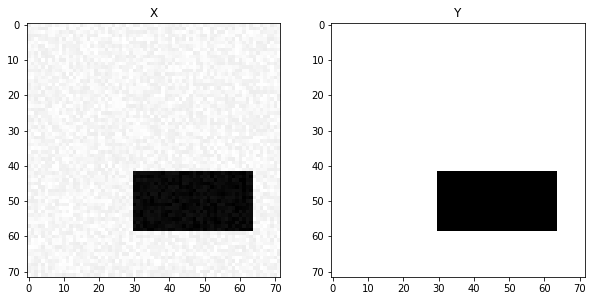

In [23]:
idx = 24
plt.figure(figsize=(10,5))
plt.subplot("121")
plt.imshow(X_train[idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title("X")
plt.subplot("122")
plt.imshow(Y_train[idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title("Y")
plt.show()

Reformatting the input & output for CNNs:

In [24]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_train = X_train.astype('float32')
print(X_train.shape)

Y_train = Y_train.reshape(Y_train.shape[0], 72, 72, 1)
Y_train = Y_train.astype('float32')
print(Y_train.shape)

(300, 72, 72, 1)
(300, 72, 72, 1)


## Model definition: 1st model - Denoising Auto-Encoder

Xe define here a denoising auto-encoder thanks to the "UpSampling2D" function of Keras (which allows to increase image sizes by repeating its rows or columns).

Architecture:
**Enconding:**
* Convolution 16 filters of size $4 \times 4$ ('same' padding is used to conserve image size through the network)
* Max-pooling of size $2 \times 2$
* Convolution 8 filters of size $4 \times 4$ 
* Max-pooling of size $2 \times 2$
* Convolution 8 filters of size $4 \times 4$ 
* Max-pooling of size $2 \times 2$


**Decoding:**
* Convolution 8 filters of size $4 \times 4$ 
* Up-sampling of size $2 \times 2$
* Convolution 8 filters of size $4 \times 4$ 
* Up-sampling of size $2 \times 2$
* Convolution 16 filters of size $4 \times 4$ 
* Up-sampling of size $2 \times 2$
* Convolution of only one filter of size $4 \times 4$ 


**Note: we use a sigmoid activation function for the final layer (and use a cross-entropy loss) since the problem here is a pixel-wise classification (in the not-corrupted image pixels are either 0 or 1)**

In [42]:
from keras.layers import UpSampling2D
from keras.layers import Conv2D, MaxPooling2D

model_ae = Sequential([Conv2D(16, (4, 4), activation='relu', input_shape=(72, 72, 1), padding='same'), # Enconding
                       MaxPooling2D(pool_size=(2, 2), padding='same'),
                       Conv2D(8, (4, 4), activation='relu', padding='same'),
                       MaxPooling2D(pool_size=(2, 2), padding='same'),
                       Conv2D(8, (4, 4), activation='relu', padding='same'),
                       MaxPooling2D(pool_size=(2, 2), padding='same'),
                       Conv2D(8, (4, 4), activation='relu', padding='same'), # Decoding
                       UpSampling2D((2, 2)),
                       Conv2D(8, (4, 4), activation='relu', padding='same'),
                       UpSampling2D((2, 2)),
                       Conv2D(16, (4, 4), activation='relu', padding='same'),
                       UpSampling2D((2, 2)),
                       Conv2D(16, (4, 4), activation='relu', padding='same'),
                       Conv2D(1, (1, 1), activation='sigmoid', padding='same')])

Adam optimizer:

In [43]:
from keras.optimizers import Adam

adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-4, amsgrad=False)

model_ae.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

Fit:

In [44]:
model_ae.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
300/300 [==============================] - 13s 44ms/step - loss: 0.4927 - acc: 0.8320
Epoch 2/20
300/300 [==============================] - 14s 48ms/step - loss: 0.2810 - acc: 0.9138
Epoch 3/20
300/300 [==============================] - 12s 40ms/step - loss: 0.2239 - acc: 0.9138
Epoch 4/20
300/300 [==============================] - 9s 29ms/step - loss: 0.1472 - acc: 0.9138
Epoch 5/20
300/300 [==============================] - 9s 29ms/step - loss: 0.1077 - acc: 0.9138
Epoch 6/20
300/300 [==============================] - 8s 27ms/step - loss: 0.0957 - acc: 0.9138
Epoch 7/20
300/300 [==============================] - 8s 28ms/step - loss: 0.0891 - acc: 0.9138
Epoch 8/20
300/300 [==============================] - 8s 28ms/step - loss: 0.0829 - acc: 0.9160
Epoch 9/20
300/300 [==============================] - 9s 29ms/step - loss: 0.0794 - acc: 0.9787
Epoch 10/20
300/300 [==============================] - 9s 28ms/step - loss: 0.0750 - acc: 0.9815
Epoch 11/20
300/300 [===============

Test set:

In [45]:
[X_test, Y_test] = generate_test_set_denoising()

Creating data:
0
100
200


Reformatting the input & output:

In [46]:
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
X_test = X_test.astype('float32')
print(X_test.shape)

Y_test = Y_test.reshape(Y_test.shape[0], 72, 72, 1)
Y_test = Y_test.astype('float32')
print(Y_test.shape)

(300, 72, 72, 1)
(300, 72, 72, 1)


Evaluation:

we can observe similar cross-entropy values and accuracies

In [47]:
model_ae.evaluate(X_test, Y_test)

300/300 [==============================] - 3s 9ms/step


[0.02401501384874185, 0.9903272859255473]

Denoising on a random sample from test set:

In [48]:
Y_pred = model_ae.predict(X_test)

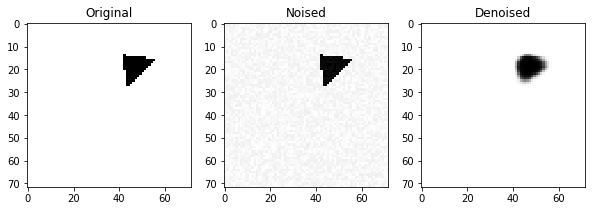

In [49]:
idx = np.random.randint(0, 300)
plt.figure(figsize=(10,15))
plt.subplot("131")
plt.imshow(Y_test[idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title("Original")
plt.subplot("132")
plt.imshow(X_test[idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title("Noised")
plt.subplot("133")
plt.imshow(Y_pred[idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title("Denoised")
plt.show()

We can observe that the boundaries are the most difficult parts of the images to denoise. One may retrieve sharper boundaries by simply thresholding the output image of the DAE.

Small shapes are also harder to reconstruct properly and tend to be rounder than their corresponding ground truths. This is due to the convolution operation that locally "averages" values. When the shape at hand has a size similar to the kernel size, this averaging effect loses the boundary information.

One way to overcome this problem is to use the high-resolution outputs of the encoding part of the network as "templates" for the shape reconstruction in the decoding part of the network. To enable this use of templates, we simply connect outputs from the encoding part to inputs of the decoding part. CNN layers of the decoding part have as input a concatenated tensor of the high-resolution output of their encoding counterpart and the output of the previous max-pooling layer. This kind of structure corresponds to a **hourglass structure** and is implemented in what follows with a very shallow Auto-Encoder:

### Hourglass-network

In [51]:
from keras.layers import concatenate, Input
from keras.models import Model


input_object = Input(shape=(72, 72, 1))

a = Conv2D(16, (4, 4), activation='relu', padding='same')(input_object)
b = MaxPooling2D((2, 2), padding='same')(a)

c = Conv2D(32, (3, 3), activation='relu', padding='same')(b)
d = MaxPooling2D((2, 2), padding='same')(c)

e = UpSampling2D((2, 2))(d)
f = Conv2D(32, (3, 3), activation='relu', padding='same')(concatenate([e, c]))

g = UpSampling2D((2, 2))(f)
h = Conv2D(16, (4, 4), activation='relu', padding='same')(concatenate([g, a]))

h = Conv2D(16, (4, 4), activation='relu', padding='same')(h)
final = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(h)

model_hourglass = Model(input_object, final)

Adam optimizer:

In [52]:
adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-4, amsgrad=False)

model_hourglass.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

Fit:

In [53]:
model_hourglass.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
300/300 [==============================] - 27s 90ms/step - loss: 0.2990 - acc: 0.9138
Epoch 2/10
300/300 [==============================] - 22s 72ms/step - loss: 0.0879 - acc: 0.9138
Epoch 3/10
300/300 [==============================] - 22s 72ms/step - loss: 0.0674 - acc: 0.9449
Epoch 4/10
300/300 [==============================] - 22s 72ms/step - loss: 0.0301 - acc: 0.9939
Epoch 5/10
300/300 [==============================] - 23s 78ms/step - loss: 0.0175 - acc: 0.9945
Epoch 6/10
300/300 [==============================] - 22s 74ms/step - loss: 0.0129 - acc: 0.9960
Epoch 7/10
300/300 [==============================] - 21s 71ms/step - loss: 0.0085 - acc: 0.9972
Epoch 8/10
300/300 [==============================] - 22s 73ms/step - loss: 0.0064 - acc: 0.9979
Epoch 9/10
300/300 [==============================] - 21s 72ms/step - loss: 0.0052 - acc: 0.9982
Epoch 10/10
300/300 [==============================] - 23s 76ms/step - loss: 0.0042 - acc: 0.9986


Test set:

In [54]:
[X_test, Y_test] = generate_test_set_denoising()

Creating data:
0
100
200


Reformatting the input & output:

In [55]:
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
X_test = X_test.astype('float32')
print(X_test.shape)

Y_test = Y_test.reshape(Y_test.shape[0], 72, 72, 1)
Y_test = Y_test.astype('float32')
print(Y_test.shape)

(300, 72, 72, 1)
(300, 72, 72, 1)


Evaluation:

we can observe similar cross-entropy values and accuracies

In [56]:
model_hourglass.evaluate(X_test, Y_test)

300/300 [==============================] - 7s 22ms/step


[0.0034420962538570165, 0.9989326198895773]

Denoising on a random sample from test set:

In [57]:
Y_pred = model_ae.predict(X_test)

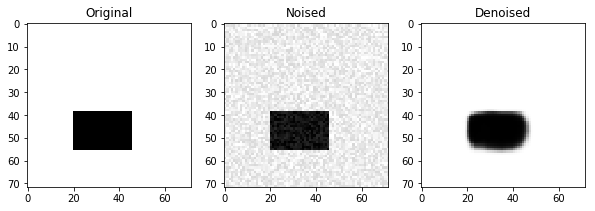

In [60]:
idx = np.random.randint(0, 300)
plt.figure(figsize=(10,15))
plt.subplot("131")
plt.imshow(Y_test[idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title("Original")
plt.subplot("132")
plt.imshow(X_test[idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title("Noised")
plt.subplot("133")
plt.imshow(Y_pred[idx].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title("Denoised")
plt.show()

Thus with much less layers (and consequently parameters), we are able to get barely the same performances as with the classical auto-encoder thanks to the add of a link between the noisy input and the last layer.